In [9]:
using CSV
using DataFrames
using CairoMakie
using AlgebraOfGraphics
using GLM
using Statistics
using Distributions
using Random
using MultivariateStats

In [10]:
# load default data
defData = CSV.File("dataset/Default.csv") |> DataFrame;

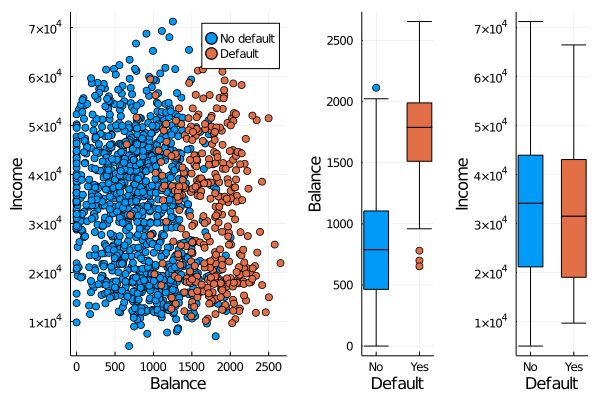

In [3]:
# Figure 4.1
def_no = defData[(defData.default .== "No"), :]
def_no = def_no[1:1000, :]
def_yes = defData[(defData.default .== "Yes"), :]

p1 = scatter(def_no.balance, def_no.income, label="No default")
p1 = scatter!(def_yes.balance, def_yes.income, xlabel="Balance", ylabel="Income", label="Default")

p2 = boxplot(["No"], [def_no.balance])
p2 = boxplot!(["Yes"], [def_yes.balance], xlabel="Default", ylabel="Balance", legend=false)

p3 = boxplot(["No"], [def_no.income])
p3 = boxplot!(["Yes"], [def_yes.income], xlabel="Default", ylabel="Income", legend=false)

gr(size = (600, 1000))
plot(p1, p2, p3, layout =grid(1, 3, widths=[0.6 ,0.2, 0.2]))

In [4]:
defData.is_Default = convert(Array{Int64, 1}, defData.default .== "Yes");

In [5]:
# fit 
linear = lm(@formula(is_Default ~ balance), defData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_Default ~ 1 + balance

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.075192     0.00335436  -22.42    <1e-99  -0.0817672    -0.0686167
balance       0.000129872  3.47493e-6   37.37    <1e-99   0.000123061   0.000136684
───────────────────────────────────────────────────────────────────────────────────

In [6]:
# Table 4.1
logit = glm(@formula(is_Default ~ balance), defData, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_Default ~ 1 + balance

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error       z  Pr(>|z|)   Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -10.6513      0.361157    -29.49    <1e-99  -11.3592    -9.94348
balance        0.00549892  0.00022037   24.95    <1e-99    0.005067   0.00593083
────────────────────────────────────────────────────────────────────────────────

In [7]:
# figure 4.2
gr(size = (600, 300))

y_balance = def_yes.balance

def_no = defData[(defData.default .== "No"), :]
n_balance = def_no.balance

x = [0; 2700]
y = predict(linear, DataFrame(balance=x))
p1 = hline([0, 1], line=:dash, legend=false)
p1 = scatter!(y_balance, ones(length(y_balance)), markercolor="yellow")
p1 = scatter!(n_balance, zeros(length(n_balance)), markercolor="yellow")
p1 = plot!(x, y, lw = 3, lc="blue")

p2 = hline([0, 1], line=:dash, legend=false)
p2 = scatter!(y_balance, ones(length(y_balance)), markercolor="yellow")
p2 = scatter!(n_balance, zeros(length(n_balance)), markercolor="yellow")
x = collect(0:0.1:2700)
y = predict(logit, DataFrame(balance=x))
p2 = plot!(x, y, lw = 3, lc="blue")

plot(p1, p2, layout =grid(1, 2, widths=[0.5 ,0.5]))

In [8]:
# Table 4.2
logit_1 = glm(@formula(is_Default ~ student), defData, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_Default ~ 1 + student

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       z  Pr(>|z|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)   -3.50412    0.0706012  -49.63    <1e-99  -3.6425    -3.36575
student: Yes   0.404882   0.114939     3.52    0.0004   0.179606   0.630158
───────────────────────────────────────────────────────────────────────────

In [9]:
# Table 4.3
logit_2 = glm(@formula(is_Default ~ balance + income/1000 + student), defData, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_Default ~ 1 + balance + :(income / 1000) + student

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                      Coef.   Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)    -10.869       0.492256     -22.08    <1e-99  -11.8338     -9.90424
balance          0.00573651  0.000231895   24.74    <1e-99    0.005282    0.00619101
income / 1000    0.00303345  0.00820262     0.37    0.7115   -0.0130434   0.0191103
student: Yes    -0.646776    0.236253      -2.74    0.0062   -1.10982    -0.183729
────────────────────────────────────────────────────────────────────────────────────

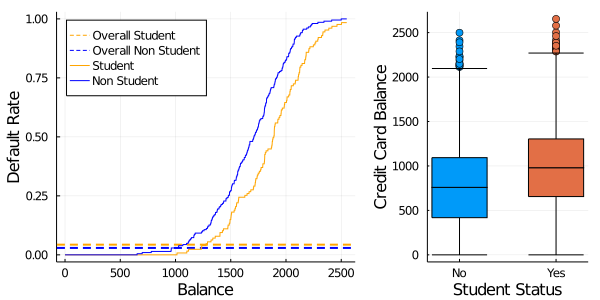

In [40]:
# Figure 4.3
gr(size = (600, 300))

student_data = defData[(defData.student .== "Yes"), :]
non_stu_data = defData[(defData.student .== "No") , :]

num_student_default = nrow(student_data[(student_data.default .== "Yes"), :])
overall_default_student = num_student_default / nrow(student_data)

num_non_stu_default = nrow(non_stu_data[(non_stu_data.default .== "Yes"), :])
overall_default_non_stu = num_non_stu_default / nrow(non_stu_data)

p1 = hline([overall_default_student], line=:dash, label="Overall Student", lw=2, lc="orange")
p1 = hline!([overall_default_non_stu], line=:dash, label="Overall Non Student", lw=2, lc="blue")

default_student_data =  student_data[(student_data.default .== "Yes"), :]
p = []
for i in 0:2550
    x = nrow(default_student_data[default_student_data.balance .< i, :])
    push!(p, x/nrow(default_student_data))
end
p1 = plot!(collect(0:2550), p, legend = :outerbottom, label="Student", lc="orange")

default_non_student_data =  non_stu_data[(non_stu_data.default .== "Yes"), :]
p = []
for i in 0:2550
    x = nrow(default_non_student_data[default_non_student_data.balance .< i, :])
    push!(p, x/nrow(default_non_student_data))
end
# p1 = plot!(collect(500:2500), p, legend = :outerbottom, label="Non Student", xlabel="Balance", ylabel="Default Rate", lc="blue")
p1 = plot!(collect(0:2550), p, legend = :topleft, label="Non Student", xlabel="Balance", ylabel="Default Rate", lc="blue")


p2 = boxplot(["No"], [non_stu_data.balance])
p2 = boxplot!(["Yes"], [student_data.balance], xlabel="Student Status", ylabel="Credit Card Balance", legend=false)

plot(p1, p2, layout =grid(1, 2, widths=[0.65 ,0.35]))

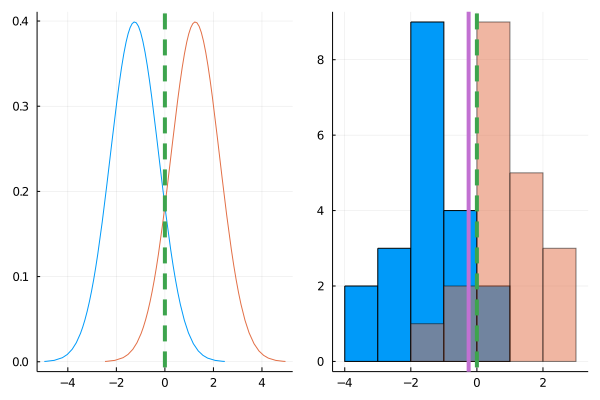

In [16]:
# Figure 4.4
d1 = Normal(-1.25, 1.0)
d2 = Normal(1.25, 1.0)

p1 = plot(d1)
p1 = plot!(d2)
p1 = vline!([0], line = (4, :dash), legend=false)

# sample
x1 = rand(d1, 20)
x2 = rand(d2, 20)

# estimate
m1 = sum(x1) / 20
m2 = sum(x2) / 20
m = (m1 + m2) / 2

p2 = histogram(x1, bins=:sturges)
p2 = histogram!(x2, fill = 0, alpha = 0.5, bins=:sturges)
p2 = vline!([0], line=(4, :dash))
p2 = vline!([m], line=(4), legend=false)

plot(p1, p2)

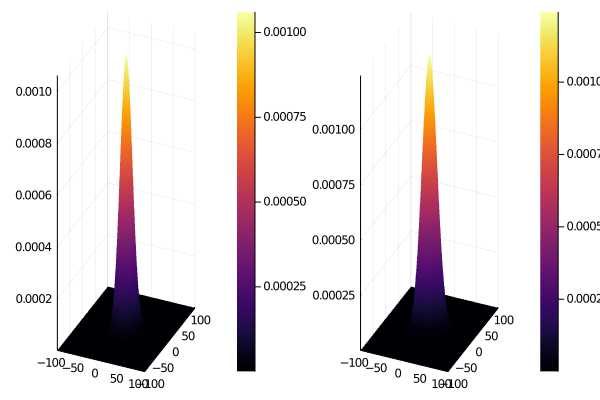

In [6]:
# Figure 4.5
mvnorm = MvNormal(zeros(2), [150.0 0; 0 150.0])
Z = [pdf(mvnorm,[i,j]) for i in -100:100, j in -100:100]
p1 = plot(-100:100,-100:100,Z,st=:surface)

mvnorm = MvNormal(zeros(2), [100.0 60.0; 60.0 200.0])
Z = [pdf(mvnorm,[i,j]) for i in -100:100, j in -100:100]
p2 = plot(-100:100,-100:100,Z,st=:surface)

plot(p1, p2)

In [7]:
# Figure 4.6,4.7, 4.8, 4.9, 4.10, 4.11
# Table 4.4 4.5
# TODO: Linear discriminant analysis is poorly documented in Julialang